# Work Sample Exercise – Junior Data Specialist – Global Forest Watch.

In this work sample, we will answer and do the following questions:

1) How large/ how many rows are in the dataset?
2) What is the spatial extent of the dataset?
3) How many mills have an unknown parent company?
4) Which country has the most palm oil mills?
5) Map the palm oil mills, distinguishing those that are RSPO Certified from those that are not.

This will be done primarily through python and its associated packages. The notebook will also demonstrate how to use the google maps api to create alternative maps. Here we go!

### First we must import packages and read in the data to prepare the analysis.

In [1]:
# Import all of the packages that are necessary for the demonstration.
# Pandas will be used for reading in uml.csv as well as analyzing it
# Geopandas is used to facilitate working with spatial data
# shapely.geometry is a package that works with Geopandas and creates geometric objects
# matplotlib will allow the script to map out objects

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

#the magic function runs on the backend and allows plots to be shown beneath each kernel 

%matplotlib inline

In [2]:
# read in csv and save it to variable df using pandas

df = pd.read_csv('uml.csv')

In [3]:
# By using a lambda function, the points variable contains a loop in which the Longitude and Latitude
# columns are looped over and turned into Point objects. This allows data manipulation with geopandas

points = df.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
points.head(3)

0    POINT (-48.58567 -2.253539)
1    POINT (103.538323 1.730858)
2      POINT (150.23735 -5.6225)
dtype: object

In [4]:
# GeoDataFrames are like normal data frames but with geometry attached to them.
# The mills variable creates a new column which is equal to the previously made variable points (right-most column).

mills = gpd.GeoDataFrame(df, geometry = points)

# Ensures that the dataframe views geometry as latitude and longitude values

mills.crs = {'init': 'epsg:4326'}
mills.head(3)

/Users/paulacortes/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,UML_ID,Parent_Com,Mill_name,RSPO_STATU,RSPO_Type,Date,Latitude,Longitude,GPS,GPS_X,GPS_Y,ISO,Country,Province,District,Confidence,Alternativ,UML_ID_1,geometry
0,PO1000000017,Agropalma Group,Agropalma Group - Cpa Mill,Not RSPO Certified,NaN,43438,-2.253539,-48.585670,"-2.253539, -48.58567",-48.585670,-2.253539,BRA,Brazil,Pará,Acará,2 - High Confidence,NaN,PO1000000017,POINT (-48.58567 -2.25354)
1,PO1000000019,Epa Management Sdn Bhd,Kulim (Malaysia) Berhad - Sedenak Palm Oil Mill,RSPO Certified,"RSPO Certified, MB",43438,1.730858,103.538323,"1.730858, 103.538323",103.538323,1.730858,MYS,Malaysia,Johor,Johor Baharu,1 - Fully Verified,NaN,PO1000000019,POINT (103.53832 1.73086)
2,PO1000000020,Sime Darby Plantation Berhad,New Britain Palm Oil Ltd – Mosa,RSPO Certified,"RSPO Certified, IP",43438,-5.622500,150.237350,"-5.6225, 150.23735",150.237350,-5.622500,PNG,Papua New Guinea,West New Britain,Talasea,1 - Fully Verified,NaN,PO1000000020,POINT (150.23735 -5.62250)


# 1) How large/ how many rows are in the dataset?

In [5]:
# Shows how many rows, or the length of the dataframe.

len(df)

1818

## The dataset is 1818 rows long. 

# 2) What is the spatial extent of the dataset?

### There are two ways to do this, by finding out the 'corners', or the uppermost and bottommost points of the Longitude and Latitude columns of our data, or by visually projecting it.

In [6]:
# Creates two variables. Both are lists which take the max and min of the longitude and latitude columns.

upper = [df.Longitude.max(), df.Latitude.max()]
lower = [df.Longitude.min(), df.Latitude.min()]

print (upper)
print (lower)

[160.2187, 18.978228]
[-94.91766899999999, -18.233432999999998]


### The coordinates above represent the 'bounding box' of our dataset, but they aren't easily understandable. The next step will plot the entire dataset onto a map.

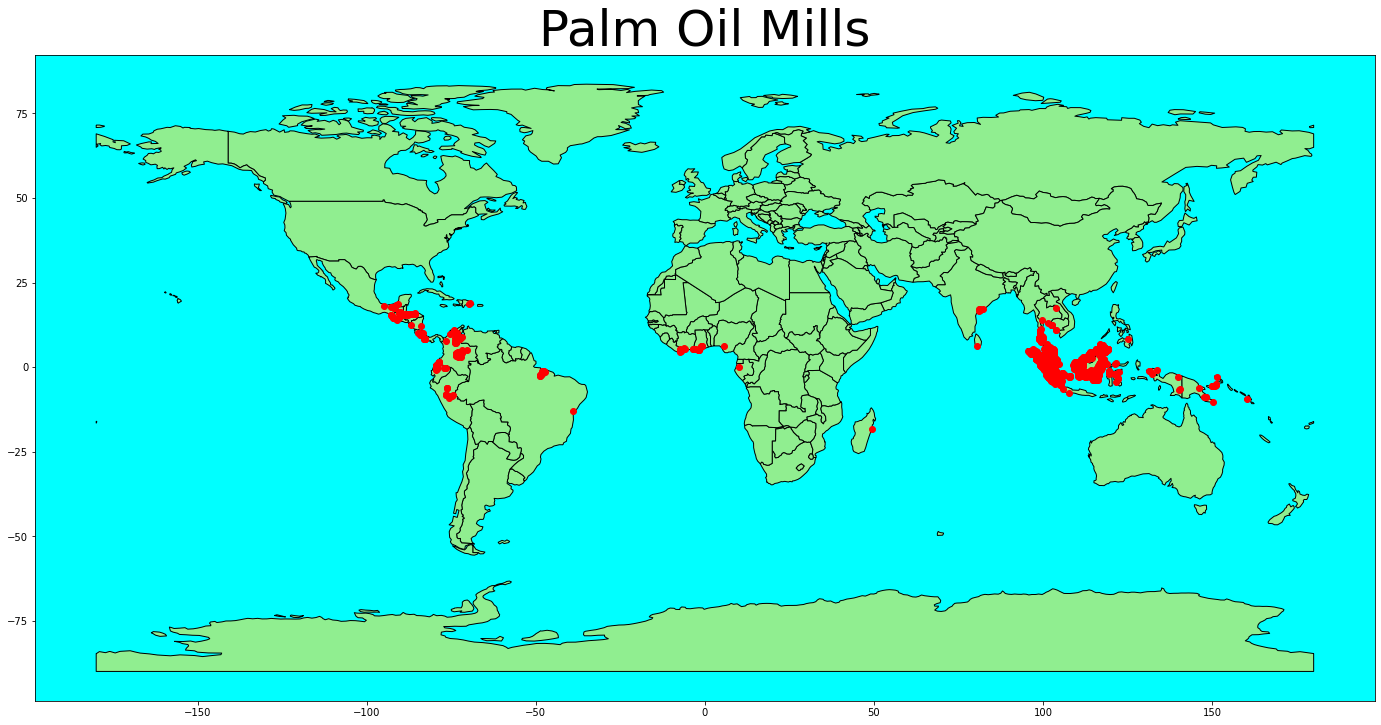

In [7]:
# Brings in basic world map from the Geopandas library.

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Creates basic configuration for the map. This includes size, color, boundary color, and background color.

ax = world.plot(figsize = (24, 50), color='lightgreen', edgecolor='black')
ax.set_facecolor('aqua')

# Takes the mills variable, which read in all of the lat long values in the df and plots them onto the map.

mills.plot(ax=ax, color='red', zorder=1)

# Creates a title for map and indicates fontsize

plt.title('Palm Oil Mills', color='black', fontsize = 50)
plt.show()


### The same data can also be displayed using the google maps api, which make the map interactive rather than a static image.

In [8]:
# Import the necessary packages. gmaps allows the api key to be registered, as well as use the functions within it.

import gmaps

# Using pandas, the line creates a subset the uml.csv table. It takes only the latitude and longitude coordinates,
# which will then be plotted onto the map.

locations = df[['Latitude', 'Longitude']]

# Creates the basemap, instructs what type of map it will be (heatmap) and adds the locations variable to the map.

fig = gmaps.figure()
symbol = gmaps.heatmap_layer(locations)
fig.add_layer(symbol)
fig

Figure(layout=FigureLayout(height='420px'))

## The map demonstrates the extent of the dataset. It stays within mid-latitudes and spans throughout many countries, from Mexico to the Solomon Islands.

# 3) How many mills have an unknown parent company?

### By querying the dataset with pandas the script will find out. First it is important to find out if the Parent_Com column has any null(Nan) values.

In [9]:
# Finds out if there are any null values within the Parent_Com column.

df.Parent_Com.isnull().sum()

0

### Since there are none, find if Unknown or unknown are spelt differently

In [10]:
# Sorts through the Parent_Com column for any values that are equal to either spelling of unknown.

df[(df.Parent_Com == 'Unknown') | (df.Parent_Com == 'unknown')]

,UML_ID,Parent_Com,Mill_name,RSPO_STATU,RSPO_Type,Date,Latitude,Longitude,GPS,GPS_X,GPS_Y,ISO,Country,Province,District,Confidence,Alternativ,UML_ID_1,geometry
20,PO1000000101,Unknown,Segaliud Oil Mill - Sime Darby,Not RSPO Certified,NaN,43438,5.726001,117.754574,"5.726001, 117.754574",117.754574,5.726001,MYS,Malaysia,Sabah,Sandakan,1 - Fully Verified,NaN,PO1000000101,POINT (117.75457 5.72600)
148,PO1000000576,Unknown,Kks Bukit Mendi -Felda,Not RSPO Certified,NaN,43438,3.205803,102.303442,"3.205803, 102.303442",102.303442,3.205803,MYS,Malaysia,Pahang,Bera,1 - Fully Verified,NaN,PO1000000576,POINT (102.30344 3.20580)
152,PO1000000607,Unknown,Ks Jengka 21-Felda,Not RSPO Certified,NaN,43438,3.740236,102.489625,"3.740236, 102.489625",102.489625,3.740236,MYS,Malaysia,Pahang,Maran,1 - Fully Verified,NaN,PO1000000607,POINT (102.48963 3.74024)
253,PO1000001703,Unknown,Fpisb Ks Kalabakan,Not RSPO Certified,NaN,43438,4.370035,117.512487,"4.370035, 117.512487",117.512487,4.370035,MYS,Malaysia,Sabah,Tawau,1 - Fully Verified,NaN,PO1000001703,POINT (117.51249 4.37003)
268,PO1000001895,Unknown,Fpisb Kilang Sawit Keratong 3,Not RSPO Certified,NaN,43438,2.929591,102.935503,"2.929591, 102.935503",102.935503,2.929591,MYS,Malaysia,Pahang,Rompin,1 - Fully Verified,NaN,PO1000001895,POINT (102.93550 2.92959)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,PO1000006358,Unknown,Kilang Isi Sawit (Felda),Not RSPO Certified,NaN,43438,1.450600,103.906000,"1.4506, 103.906",103.906000,1.450600,MYS,Malaysia,Johor,Johor Baharu,2 - High Confidence,NaN,PO1000006358,POINT (103.90600 1.45060)
1271,PO1000006362,Unknown,Kapuasindo Palm Industry,Not RSPO Certified,NaN,43438,1.019664,111.879215,"1.019664, 111.879215",111.879215,1.019664,IDN,Indonesia,West Kalimantan,Kapuas Hulu,1 - Fully Verified,NaN,PO1000006362,POINT (111.87921 1.01966)
1283,PO1000007049,Unknown,Rinwood Pelita Plantation,Not RSPO Certified,NaN,43438,2.515988,112.331157,"2.515988, 112.331157",112.331157,2.515988,MYS,Malaysia,Sarawak,Selangau,1 - Fully Verified,NaN,PO1000007049,POINT (112.33116 2.51599)
1284,PO1000007050,Unknown,Sewangi Sejati Luhur,Not RSPO Certified,NaN,43438,0.737950,100.781475,"0.73795, 100.781475",100.781475,0.737950,IDN,Indonesia,Riau,Kabupaten Kampar,1 - Fully Verified,NaN,PO1000007050,POINT (100.78148 0.73795)


## By sorting through both spellings, and looking at the amount of rows, there are 93 mills with an unknown parent company.

# 4) Which country has the most palm oil mills?

In [11]:
# Points out the most recurring value in the 'Country' column.

df['Country'].value_counts().idxmax()

'Indonesia'

### Indonesia has the most, but the command didn't specify how many. The next line will. 

In [12]:
# Points out a list of the most recurring values in the column in order from greatest to least.

df['Country'].value_counts()

Indonesia             1043
Malaysia               503
Colombia                65
Thailand                43
Ecuador                 31
Guatemala               18
Papua New Guinea        15
Honduras                15
Mexico                  14
Brazil                  12
Côte d'Ivoire           11
Peru                    10
Costa Rica               8
Ghana                    7
India                    6
Panama                   4
Nicaragua                2
Cambodia                 2
Dominican Republic       2
Philipines               1
Sri Lanka                1
Madagascar               1
Nigeria                  1
Venezuela                1
Gabon                    1
Solomon Islands          1
Name: Country, dtype: int64

## The country with the most mills is Indonesia with 1043 mills.

# 5) Map the palm oil mills, distinguishing those that are RSPO Certified from those that are not.

### The first step is to separate those mills that are certified from those that are not.

In [13]:
# Certified and non_certified take all rows in which the column value equals the expressions 'RSPO Certified'
# or 'Not RSPO Certified'. Using the .loc function from pandas, itt creates a subset of data and
# assigns it to their respective variables.

certified = mills.loc[df['RSPO_STATU'] == 'RSPO Certified']
not_certified = mills.loc[df['RSPO_STATU'] == 'Not RSPO Certified']

print (certified.count())
print (not_certified.count())

UML_ID        356
Parent_Com    356
Mill_name     356
RSPO_STATU    356
RSPO_Type     356
Date          356
Latitude      356
Longitude     356
GPS           356
GPS_X         356
GPS_Y         356
ISO           356
Country       356
Province      356
District      354
Confidence    356
Alternativ      8
UML_ID_1      356
geometry      356
dtype: int64
UML_ID        1462
Parent_Com    1462
Mill_name     1462
RSPO_STATU    1462
RSPO_Type        0
Date          1462
Latitude      1462
Longitude     1462
GPS           1462
GPS_X         1462
GPS_Y         1462
ISO           1462
Country       1462
Province      1462
District      1452
Confidence    1462
Alternativ       7
UML_ID_1      1462
geometry      1462
dtype: int64


### By printing out the result of both variables, there are  356 certified mills, and 1462 non certified mills.

### Next is to create a map and plot the variables onto it.

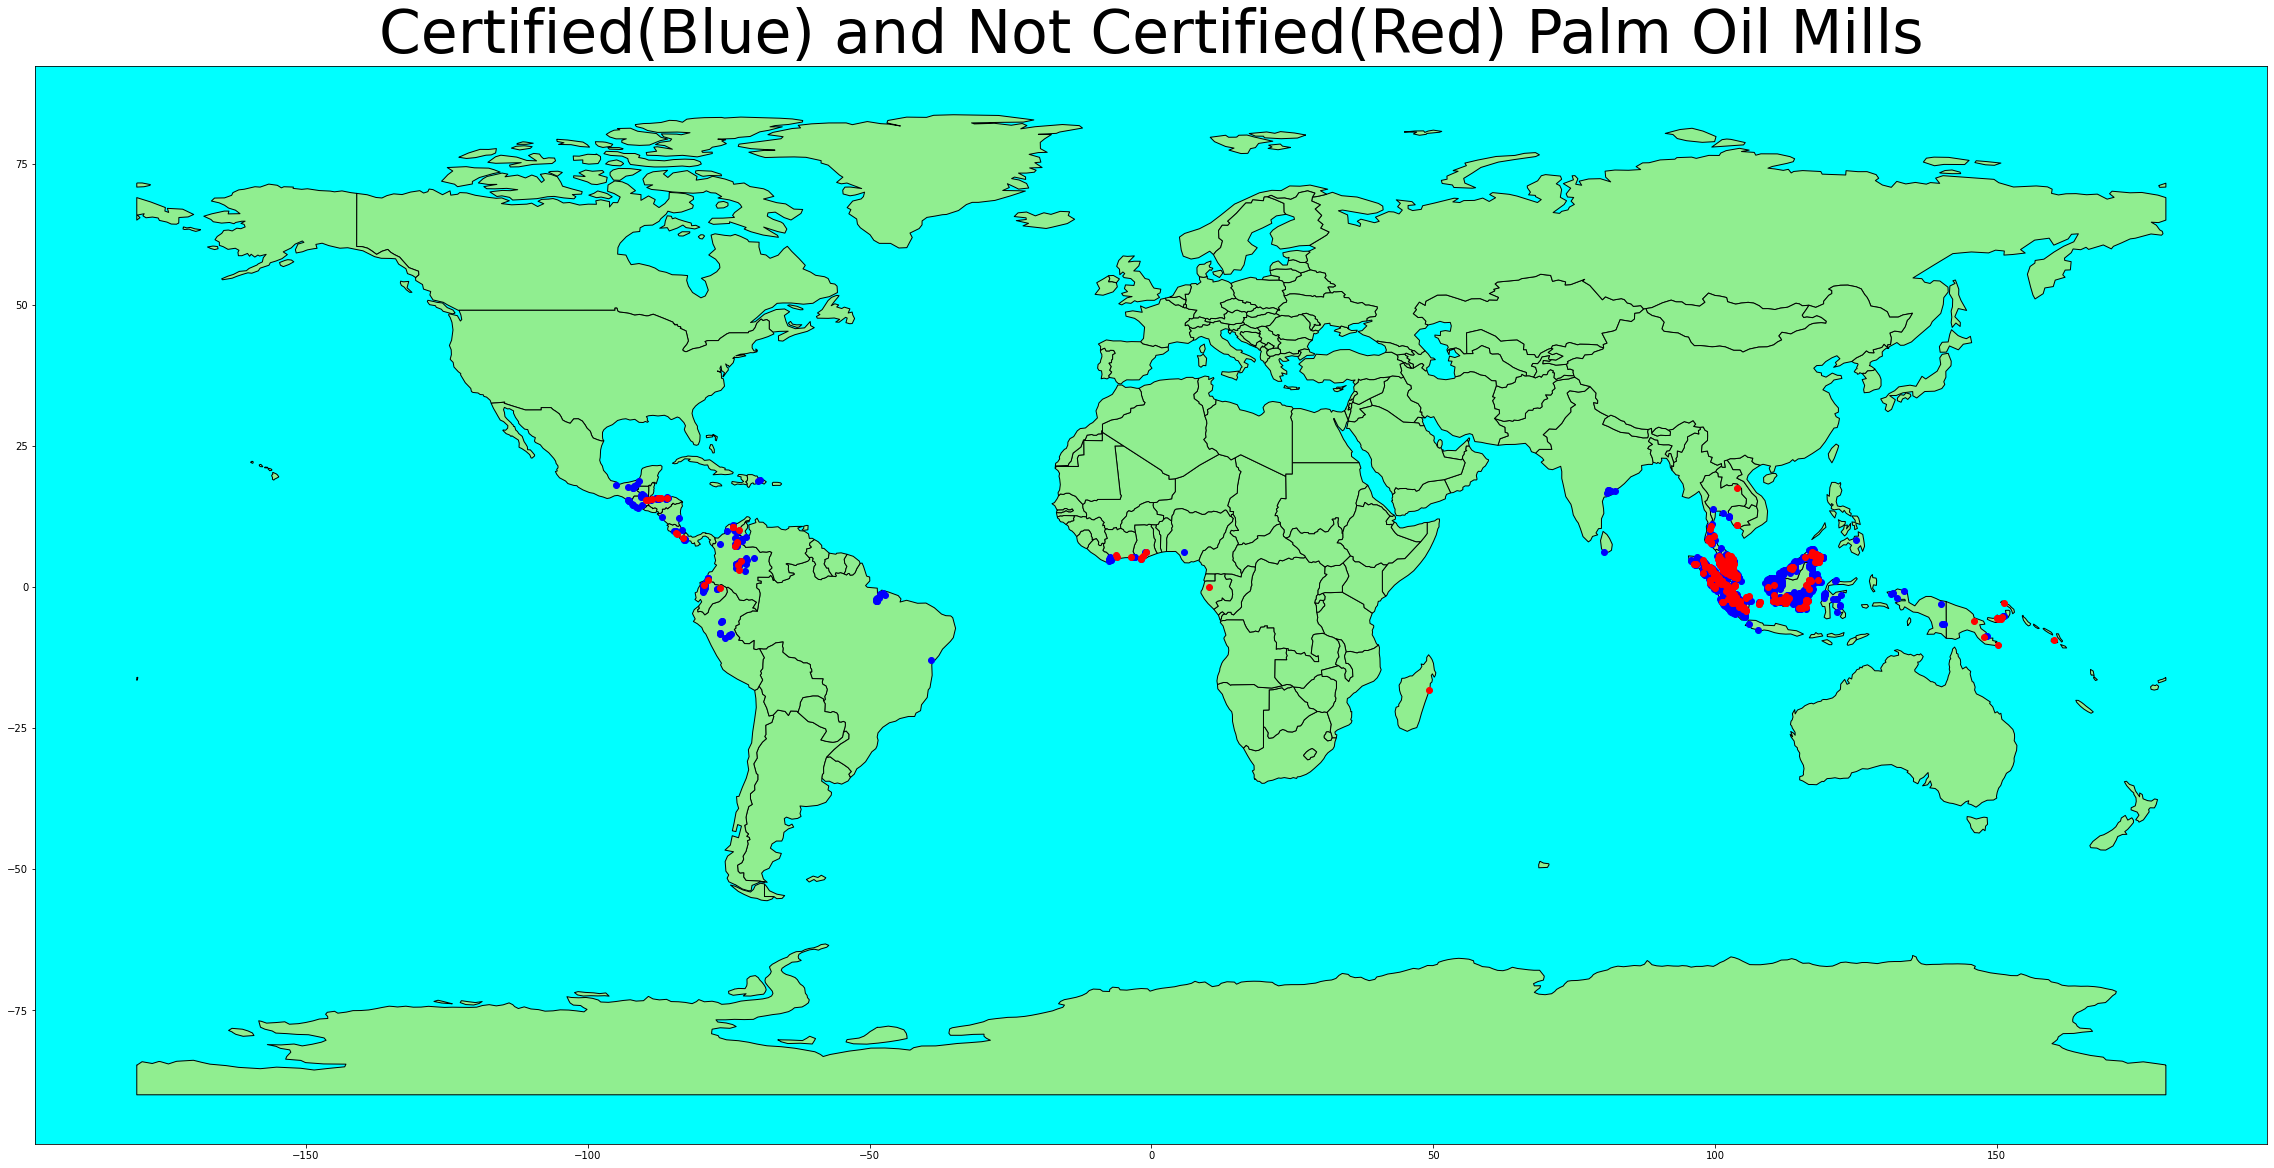

In [14]:
# Creates basic configuration for the map. This includes size, color, boundary color, and background color.

ax = world.plot(figsize = (40, 40), color='lightgreen', edgecolor='black')
ax.set_facecolor('aqua')

# Takes the certified and not_certified variables and plots them onto the map.

certified.plot(ax=ax, color='red', alpha=1, zorder=2)
not_certified.plot(ax=ax, color='blue', alpha=1, zorder=1)

# Creates a title for map and indicates fontsize

plt.title('Certified(Blue) and Not Certified(Red) Palm Oil Mills', color='black', fontsize = 60)
plt.show()

### Once again, the data can be displayed using the Google maps api key to make the map interactive.

In [15]:
# Certified and non_certified take all rows in which the column value equals the expressions 'RSPO Certified'
# or 'Not RSPO Certified'. Using the .loc function from pandas, itt creates a subset of data and
# assigns it to their respective variables.

certified = mills.loc[df['RSPO_STATU'] == 'RSPO Certified']
not_certified = mills.loc[df['RSPO_STATU'] == 'Not RSPO Certified']

# The map needs to read in the Latitude and Longitude values to plot out the data. Since the certified and
# not_certified are subsets of the original csv, the lines below will create variables which read the 
# Latitude and Longitude columns of each variable. Basically, a filter of a filter.
 
certified_subset = certified[['Latitude', 'Longitude']]
not_certified_subset = not_certified[['Latitude', 'Longitude']]

# The variables below take the certified_subset and not_certified_subset, create symbol layers, and assign colors
# to them. Blue for certified mills, red for not certified mills.

symbol_1 = gmaps.symbol_layer(certified_subset, fill_color='blue', stroke_color='blue', scale=2)
symbol_2 = gmaps.symbol_layer(not_certified_subset, fill_color='red', stroke_color='red', scale=2)

# Creates the basemap, instructs what type of map it will be (heatmap) and adds the locations variable to the map.

fig = gmaps.figure()
fig.add_layer(symbol_2)
fig.add_layer(symbol_1)
fig

Figure(layout=FigureLayout(height='420px'))

# Description of blog on blog.globalforestwatch.org

https://blog.globalforestwatch.org/commodities/getting-at-the-source-universal-mill-list-improves-traceability-of-palm-oil-supply-chains?utm_campaign=gfw&amp;utm_source=gfwblog&amp;utm_medium=hyperlink&amp;utm_term=umlv2_11_2019

### Palm oil mills have complex supply chains, which makes it difficult to monitor their practices and impact on deforestation. The Universal Mill List (UML) is an open-source data file which centralizes and standardizes information about palm oil mills throughout the world. It is especially useful because it facilitates verification, sharing, and ensures that no mills are double counted through its universal ID system. The UML improves industry transparency, and helps companies ensure their commitment to sustainable development.